
## IS KENYA LIVING BEYOND HER MEANS?




---



# The following analysis aims to analyze the trend of Kenya's Income and Expenditure levels vs Debt over a 20 year period.

---



 # Research Objectives:

* To describe the expenditure and revenue levels .

* To Support or negate the hypothesis that Kenya does live beyond her means per regime.

* Predict the expenditure and revenue levels over the next 5 years.



---


# Type of analysis:


1.   Time series analysis.
2.   Trend analysis.
3.   ARIMA modelling.

# Data Analysis steps


1.   Data preprocessing.
2.   Exploratory Data Analysis.
3.   Predictive Analysis.





In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.preprocessing import StandardScaler

# Load the Revenue, Expenditure and Debt datasets.




In [ ]:
Revenue_Expenditure=pd.read_csv("https://raw.githubusercontent.com/Carolkinyua-hub/Public_Finance/main/508057315_Revenue%20and%20Expenditure%20(2).csv", parse_dates=True)

In [277]:
Debt=pd.read_csv("https://raw.githubusercontent.com/Carolkinyua-hub/Public_Finance/main/567245444_Public%20Debt%20-%20567245444_Public%20Debt.csv",skiprows=3,parse_dates=True)

In [ ]:
Revenue_Expenditure.head()

,FISCAL YEAR,MONTH,Import Duty,Excise Duty,Income Tax,VAT,OTHER TAX INCOME,TOTAL TAX,NON-TAX REVENUE,TOTAL REVENUE,...,Total Grants,Domestic Interest,Foreign Interest,Wages & Salaries,Pensions,Other,TOTAL RECURRENT EXPENDITURE,County Transfer,EXPENDITURE,TOTAL EXPENDITURE
0,1999,9,"7,157.00","6,869.00","12,054.00","9,255.00",NaN,"35,335.00","5,979.00","41,314.00",...,"1,203.00","3,816.00","3,068.00","16,749.00","1,387.00","12,919.00","37,939.00",NaN,"6,539.00","44,478.00"
1,1999,12,"13,912.00","14,007.00","25,545.00","19,734.00",NaN,"73,198.00","13,131.00","86,329.00",...,"2,540.00","8,935.00","4,597.00","33,483.00","2,520.00","24,135.00","73,670.00",NaN,"12,765.00","86,435.00"
2,2000,3,"21,407.00","21,182.00","37,156.00","30,091.00",NaN,"109,836.00","20,756.00","130,592.00",...,"3,663.00","15,784.00","6,039.00","50,232.00","3,732.00","39,481.00","115,268.00",NaN,"22,493.00","137,761.00"
3,2000,6,"28,605.00","28,493.00","54,402.00","40,944.00",NaN,"152,444.00","25,999.00","178,443.00",...,"4,247.00","20,752.00","8,635.00","65,861.00","5,145.00","56,142.00","156,535.00",NaN,"18,584.00","175,119.00"
4,2000,7,"2,813.00","1,572.00","2,905.00","2,708.00",NaN,"9,998.00","1,617.00","11,615.00",...,323,"2,739.00",746,"5,805.00",543,"4,225.00","14,058.00",NaN,"1,360.00","15,418.00"


In [ ]:
print("There are, data points ", Revenue_Expenditure.shape)

There are, data points  (270, 22)


In [ ]:
print(Revenue_Expenditure.columns)

Index(['FISCAL YEAR', 'Import Duty', 'Excise Duty', 'Income Tax', 'VAT',
       'OTHER TAX INCOME', 'TOTAL TAX', 'NON-TAX  REVENUE', 'TOTAL REVENUE',
       'Programme Grants', 'Projects Grants', 'Total Grants',
       'Domestic Interest ', 'Foreign Interest', 'Wages & Salaries',
       'Pensions', 'Other', 'TOTAL RECURRENT EXPENDITURE', 'County Transfer',
       'EXPENDITURE', 'TOTAL EXPENDITURE'],
      dtype='object')


# Data Cleaning

## Identifying any missing values.

In [ ]:
#Data Cleaning
Revenue_Expenditure.isnull().any()

FISCAL YEAR                    False
MONTH                          False
Import Duty                    False
Excise Duty                    False
Income Tax                     False
VAT                            False
OTHER TAX INCOME                True
TOTAL TAX                      False
NON-TAX  REVENUE               False
TOTAL REVENUE                  False
Programme Grants                True
Projects Grants                False
Total Grants                   False
Domestic Interest              False
Foreign Interest               False
Wages & Salaries               False
Pensions                       False
Other                          False
TOTAL RECURRENT EXPENDITURE    False
County Transfer                 True
EXPENDITURE                    False
TOTAL EXPENDITURE              False
dtype: bool

In [ ]:
print(Revenue_Expenditure.isnull().mean()*100)

FISCAL YEAR                     0.000000
MONTH                           0.000000
Import Duty                     0.000000
Excise Duty                     0.000000
Income Tax                      0.000000
VAT                             0.000000
OTHER TAX INCOME               65.925926
TOTAL TAX                       0.000000
NON-TAX  REVENUE                0.000000
TOTAL REVENUE                   0.000000
Programme Grants               17.037037
Projects Grants                 0.000000
Total Grants                    0.000000
Domestic Interest               0.000000
Foreign Interest                0.000000
Wages & Salaries                0.000000
Pensions                        0.000000
Other                           0.000000
TOTAL RECURRENT EXPENDITURE     0.000000
County Transfer                59.629630
EXPENDITURE                     0.000000
TOTAL EXPENDITURE               0.000000
dtype: float64


# Data Cleaning formula

# Converting data object type to integer

In [151]:
#Consolidate Columns
# Drop Collumns
#Aggregate Data
#Prepare data for analysis
Revenue_Expenditure=Revenue_Expenditure.fillna(0)
Revenue_Expenditure['TOTAL REVENUE'] = Revenue_Expenditure['TOTAL REVENUE'].astype(float).astype(int)
Revenue_Expenditure['TOTAL EXPENDITURE'] = Revenue_Expenditure['TOTAL EXPENDITURE'].astype(float).astype(int)
Revenue_Expenditure['CUM TOTAL EXPENDITURE'] = Revenue_Expenditure['TOTAL EXPENDITURE'].cumsum()
Revenue_Expenditure['CUM TOTAL REVENUE'] = Revenue_Expenditure['TOTAL REVENUE'].cumsum()
Revenue_Expenditure['DEFICIT'] = Revenue_Expenditure['TOTAL EXPENDITURE'] - Revenue_Expenditure['TOTAL REVENUE']
Revenue_Expenditure['CUM DEFICIT'] = Revenue_Expenditure['DEFICIT'].cumsum()


In [168]:
Revenue_Expenditure['Import Duty']= Revenue_Expenditure['Import Duty'].astype(float).astype(int)
Revenue_Expenditure['Excise Duty']= Revenue_Expenditure['Excise Duty'].astype(float).astype(int)
Revenue_Expenditure['Income Tax']= Revenue_Expenditure['Income Tax'].astype(float).astype(int)
Revenue_Expenditure['VAT']= Revenue_Expenditure['VAT'].astype(float).astype(int)
Revenue_Expenditure['OTHER TAX INCOME']= Revenue_Expenditure['OTHER TAX INCOME']
Revenue_Expenditure['TOTAL TAX']= Revenue_Expenditure['TOTAL TAX'].astype(float).astype(int)
Revenue_Expenditure['NON-TAX  REVENUE']= Revenue_Expenditure['NON-TAX  REVENUE'].astype(float).astype(int)
Revenue_Expenditure['TOTAL TAX']= Revenue_Expenditure['TOTAL TAX'].astype(float).astype(int)
#Revenue_Expenditure['Programme Grants']= Revenue_Expenditure['Programme Grants'].astype(float).astype(int)


In [181]:
Revenue_Expenditure['Projects Grants']= Revenue_Expenditure['Projects Grants'].astype(float).astype(int)
Revenue_Expenditure[ 'Total Grants']= Revenue_Expenditure['Total Grants'].astype(float).astype(int)
#Revenue_Expenditure ['Domestic Interest ']= Revenue_Expenditure['Domestic Interest'].astype(float).astype(int)
Revenue_Expenditure[ 'Foreign Interest']= Revenue_Expenditure['Foreign Interest'].astype(float).astype(int)
Revenue_Expenditure[ 'Wages & Salaries']= Revenue_Expenditure['Wages & Salaries'].astype(float).astype(int)
Revenue_Expenditure['Pensions']= Revenue_Expenditure['Pensions'].astype(float).astype(int)
Revenue_Expenditure[ 'Other']= Revenue_Expenditure['Other'].astype(float).astype(int)
Revenue_Expenditure['TOTAL RECURRENT EXPENDITURE']= Revenue_Expenditure['TOTAL RECURRENT EXPENDITURE'].astype(float).astype(int)
#Revenue_Expenditure[ 'County Transfer']= Revenue_Expenditure['County Transfer'].str.replace(',','').astype(float).astype(int)

In [182]:
Revenue_Expenditure.dtypes

FISCAL YEAR                     int64
Import Duty                     int64
Excise Duty                     int64
Income Tax                      int64
VAT                             int64
OTHER TAX INCOME               object
TOTAL TAX                       int64
NON-TAX  REVENUE                int64
TOTAL REVENUE                   int64
Programme Grants               object
Projects Grants                 int64
Total Grants                    int64
Domestic Interest              object
Foreign Interest                int64
Wages & Salaries                int64
Pensions                        int64
Other                           int64
TOTAL RECURRENT EXPENDITURE     int64
County Transfer                object
EXPENDITURE                    object
TOTAL EXPENDITURE               int64
CUM TOTAL EXPENDITURE           int64
CUM TOTAL REVENUE               int64
DEFICIT                         int64
CUM DEFICIT                     int64
dtype: object

#Data Normalization

In [206]:
Revenue_Expenditure.columns

Index(['FISCAL YEAR', 'Import Duty', 'Excise Duty', 'Income Tax', 'VAT',
       'OTHER TAX INCOME', 'TOTAL TAX', 'NON-TAX  REVENUE', 'TOTAL REVENUE',
       'Programme Grants', 'Projects Grants', 'Total Grants',
       'Domestic Interest ', 'Foreign Interest', 'Wages & Salaries',
       'Pensions', 'Other', 'TOTAL RECURRENT EXPENDITURE', 'County Transfer',
       'EXPENDITURE', 'TOTAL EXPENDITURE', 'CUM TOTAL EXPENDITURE',
       'CUM TOTAL REVENUE', 'DEFICIT', 'CUM DEFICIT', 'Total_Duty'],
      dtype='object')

In [207]:
Revenue_Expenditure.dtypes

FISCAL YEAR                     int64
Import Duty                     int64
Excise Duty                     int64
Income Tax                      int64
VAT                             int64
OTHER TAX INCOME               object
TOTAL TAX                       int64
NON-TAX  REVENUE                int64
TOTAL REVENUE                   int64
Programme Grants               object
Projects Grants                 int64
Total Grants                    int64
Domestic Interest              object
Foreign Interest                int64
Wages & Salaries                int64
Pensions                        int64
Other                           int64
TOTAL RECURRENT EXPENDITURE     int64
County Transfer                object
EXPENDITURE                    object
TOTAL EXPENDITURE               int64
CUM TOTAL EXPENDITURE           int64
CUM TOTAL REVENUE               int64
DEFICIT                         int64
CUM DEFICIT                     int64
Total_Duty                      int64
dtype: objec

In [209]:
Revenues_Expenditures=Revenue_Expenditure[['FISCAL YEAR', 'Income Tax', 'VAT', 'TOTAL TAX', 'NON-TAX  REVENUE', 'TOTAL REVENUE','Projects Grants', 'Total Grants', 'Foreign Interest', 'Wages & Salaries',
       'Pensions', 'Other', 'TOTAL RECURRENT EXPENDITURE', 'TOTAL EXPENDITURE', 'CUM TOTAL EXPENDITURE',
       'CUM TOTAL REVENUE', 'DEFICIT', 'CUM DEFICIT', 'Total_Duty']]


In [210]:
Revenues_Expenditures.head()

,FISCAL YEAR,Income Tax,VAT,TOTAL TAX,NON-TAX REVENUE,TOTAL REVENUE,Projects Grants,Total Grants,Foreign Interest,Wages & Salaries,Pensions,Other,TOTAL RECURRENT EXPENDITURE,TOTAL EXPENDITURE,CUM TOTAL EXPENDITURE,CUM TOTAL REVENUE,DEFICIT,CUM DEFICIT,Total_Duty
0,1999,12054,9255,35335,5979,41314,1197,1203,3068,16749,1387,12919,37939,44478,44478,41314,3164,3164,14026
1,1999,25545,19734,73198,13131,86329,2211,2540,4597,33483,2520,24135,73670,86435,130913,127643,106,3270,27919
2,2000,37156,30091,109836,20756,130592,3319,3663,6039,50232,3732,39481,115268,137761,268674,258235,7169,10439,42589
3,2000,54402,40944,152444,25999,178443,4247,4247,8635,65861,5145,56142,156535,175119,443793,436678,-3324,7115,57098
4,2000,2905,2708,9998,1617,11615,323,323,746,5805,543,4225,14058,15418,459211,448293,3803,10918,4385


In [212]:
R_E=Revenues_Expenditures.copy()

In [216]:
scaler=StandardScaler()
R_E_N=scaler.fit_transform(R_E)
R_E_N

array([[-1.8281275 , -0.90231597, -0.96269679, ..., -0.7199783 ,
        -0.87958054, -0.94049099],
       [-1.8281275 , -0.82783761, -0.86094443, ..., -0.73595044,
        -0.87957065, -0.7560616 ],
       [-1.67464665, -0.76373796, -0.7603767 , ..., -0.69905991,
        -0.87890192, -0.56131755],
       ...,
       [ 1.70193213,  3.87108431,  4.02677122, ...,  3.56404489,
         2.66631344,  3.79002382],
       [ 1.70193213, -0.64902549, -0.66576129, ..., -0.67542553,
         2.66740427, -0.76407969],
       [ 1.70193213, -0.3314863 , -0.19334448, ..., -0.50188909,
         2.67159438, -0.28223752]])

# Income Tax vs VAT

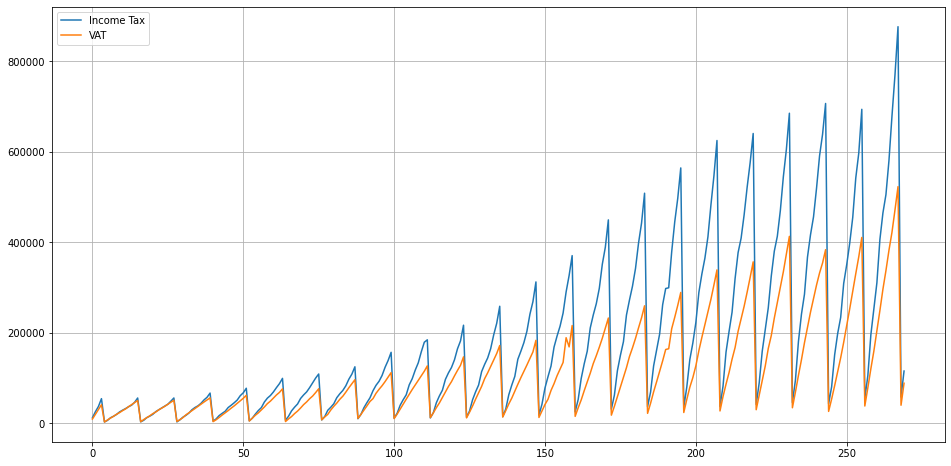

In [223]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['Income Tax'],label='Income Tax')
plt.plot(Revenues_Expenditures['VAT'],label='VAT')      
plt.grid()
plt.legend()
plt.show()

# Total Tax vs Total Revenue

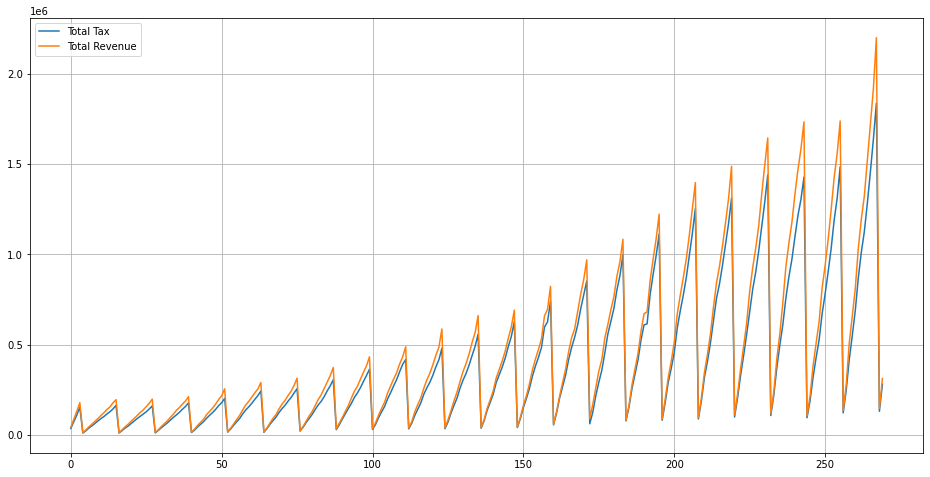

In [225]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['TOTAL TAX'],label='Total Tax')
plt.plot(Revenues_Expenditures['TOTAL REVENUE'],label='Total Revenue')      
plt.grid()
plt.legend()
plt.show()

# Contribution of Income Tax to Total Revenue

In [242]:
Revenues_Expenditures['Income Tax'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

40.47892742088486

In [244]:
Revenues_Expenditures['NON-TAX  REVENUE'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

13.005575672742125

In [245]:
Revenues_Expenditures['VAT'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

25.002144831219873

In [256]:
Revenues_Expenditures['Total_Duty'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

19.575921314460892

In [247]:
Revenues_Expenditures['Projects Grants'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

2.165482935391362

In [248]:
Revenues_Expenditures['Total Grants'].sum()/Revenues_Expenditures['TOTAL REVENUE'].sum()*100

2.2778991713284515

In [249]:
Revenues_Expenditures['Foreign Interest'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100

3.136976767712722

In [250]:
Revenues_Expenditures[ 'Wages & Salaries'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100
       

22.436211153162013

In [253]:
Revenues_Expenditures['Pensions'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100


3.500933784921307

In [252]:
Revenues_Expenditures['Other'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100

28.16225344067974

In [255]:
Revenues_Expenditures['TOTAL RECURRENT EXPENDITURE'].sum()/Revenues_Expenditures['TOTAL EXPENDITURE'].sum()*100 

68.93828961925186

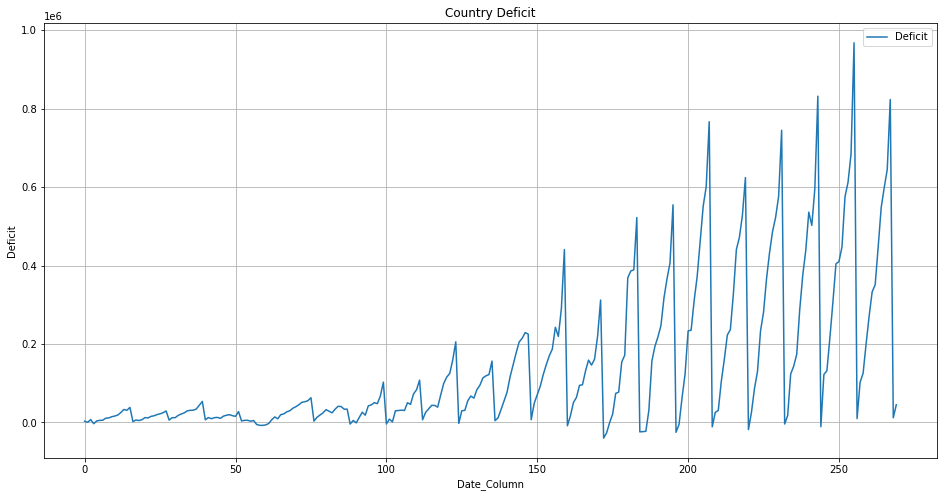

In [259]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['DEFICIT'], label = 'Deficit')
plt.xlabel('Date_Column')
plt.ylabel('Deficit')
plt.title('Country Deficit')
plt.grid()
plt.legend()
plt.show()

## Debt Data

In [278]:
Debt.head()

,Year,Month,Domestic Debt,External Debt,Total
0,1999,9,"183,417.00","320,137.00","503,554.00"
1,1999,12,"190,300.00","311,953.00","502,253.00"
2,2000,3,"201,463.22","396,800.00","598,263.22"
3,2000,6,"206,127.00","395,694.00","601,821.00"
4,2000,7,"202,362.00","394,667.37","597,029.37"


In [279]:
Debt.shape

(271, 5)

In [280]:
Debt.dtypes

Year              int64
Month             int64
Domestic Debt    object
External Debt    object
Total            object
dtype: object

In [281]:
Debt.isnull().mean()*100

Year             0.0
Month            0.0
Domestic Debt    0.0
External Debt    0.0
Total            0.0
dtype: float64

In [350]:
Debt.rename(columns={'PUBLIC DEBT':'Year',"Unnamed: 1":'Month','Unnamed: 2':'Domestic Debt','Unnamed: 3':'External Debt',"Unnamed: 4":"Total"}, inplace=True)
Debt.fillna(0)
Debt=Debt.drop('Month', axis=1)

In [351]:
Debt.dtypes

Year             int64
Domestic Debt    int64
External Debt    int64
Total            int64
dtype: object

In [352]:
Debt.columns

Index(['Year', 'Domestic Debt', 'External Debt', 'Total'], dtype='object')

In [353]:
Debt.dtypes

Year             int64
Domestic Debt    int64
External Debt    int64
Total            int64
dtype: object

In [315]:
Debt['Total']= Debt['Total'].str.replace(',','').astype(float).astype(int)

In [316]:
Debt['Domestic Debt']= Debt['Domestic Debt'].str.replace(',','').astype(float).astype(int)

In [320]:
Debt['External Debt']= Debt['External Debt'].astype(float).astype(int)

In [321]:
Debt.dtypes

Year             int64
Month            int64
Domestic Debt    int64
External Debt    int64
Total            int64
dtype: object

In [326]:
Deficit=Revenues_Expenditures['DEFICIT'].sum()

In [327]:
Total_Debt=Debt['Total'].sum()

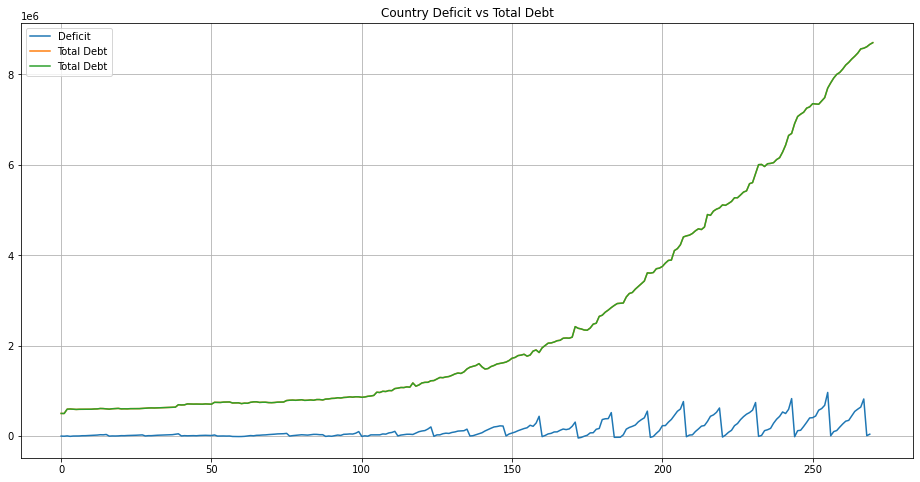

In [354]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(Revenues_Expenditures['DEFICIT'], label = 'Deficit')
Debt['Total'].plot(label="Total Debt")
Debt['Total'].plot(label="Total Debt")
plt.title('Country Deficit vs Total Debt')
plt.grid()
plt.legend()
plt.show()


# Kibaki Regime Data

In [406]:
#Kibaki Tenure
#Kibaki's Expenditure
#Kibaki Expenditures and Revenues
#Kibaki's Deficit
Kibaki_Regime= (Revenues_Expenditures['FISCAL YEAR']>= 2003) & (Revenues_Expenditures['FISCAL YEAR'] <= 2012)
Kibaki_Rev= pd.DataFrame(Revenues_Expenditures['TOTAL REVENUE'].loc[Kibaki_Regime])
Kibaki_Exp=pd.DataFrame(Revenues_Expenditures['TOTAL EXPENDITURE'].loc[Kibaki_Regime])
Kibaki_Deficit=pd.DataFrame(Revenues_Expenditures.DEFICIT.loc[Kibaki_Regime])
Kibakis=pd.DataFrame(Revenues_Expenditures['FISCAL YEAR'][Kibaki_Regime])
#Kibaki's Debt
Kibakis_Regime= (Debt['Year']>= 2003) & (Debt['Year'] <= 2012)
Kibakis_Debt=pd.DataFrame(Debt['Total'].loc[Kibakis_Regime])


In [407]:
Kibaki=pd.concat([Kibakis,Kibakis_Debt,Kibaki_Deficit,Kibaki_Exp,Kibaki_Rev],axis=1)

In [414]:
Kibaki.head()

,FISCAL YEAR,Total,DEFICIT,TOTAL EXPENDITURE,TOTAL REVENUE
34,2003,633037,29385,143691,114306
35,2003,631662,30735,166298,135563
36,2003,635620,31036,182121,151085
37,2003,639688,34135,204334,170199
38,2003,642660,43677,231008,187331


# Uhuru Tenure

In [410]:
#Uhuru Tenure
#Uhuru Expenditure
#Uhuru Expenditures and Revenues
#UhuruDeficit
Uhuru_Regime= (Revenues_Expenditures['FISCAL YEAR']>= 2013) & (Revenues_Expenditures['FISCAL YEAR'] <= 2022)
Uhuru_Rev= pd.DataFrame(Revenues_Expenditures['TOTAL REVENUE'][Uhuru_Regime])
Uhuru_Exp=pd.DataFrame(Revenues_Expenditures['TOTAL EXPENDITURE'][Uhuru_Regime])
Uhuru_Deficit=pd.DataFrame(Revenues_Expenditures.DEFICIT[Uhuru_Regime])
Uhurus=pd.DataFrame(Revenues_Expenditures['FISCAL YEAR'][Uhuru_Regime])
#Uhuru's Debt
Uhurus_Regime= (Debt['Year']>= 2013) & (Debt['Year'] <= 2022)
Uhurus_Debt=pd.DataFrame(Debt['Total'][Uhurus_Regime])


In [412]:
Uhuru=pd.concat([Uhurus,Uhurus_Debt,Uhuru_Deficit,Uhuru_Exp,Uhuru_Rev],axis=1)

In [413]:
Uhuru.head()

,FISCAL YEAR,Total,DEFICIT,TOTAL EXPENDITURE,TOTAL REVENUE
154,2013.0,1811945,169972.0,589548.0,419576.0
155,2013.0,1770017,186905.0,660191.0,473286.0
156,2013.0,1794611,242484.0,774076.0,531592.0
157,2013.0,1882405,219172.0,878171.0,658999.0
158,2013.0,1907035,290475.0,985521.0,695046.0
